In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [10]:
df = pd.read_csv('./data/Overstock_data.csv')

C:\Users\gray-owl\AppData\Local\Temp\ipykernel_19316\945809932.py:1: DtypeWarning: Columns (94,95,96,106,107,108,109,110,111,112,113,118,119,123,124,126,127,128,129,131,132,133,134,135,136,137,138,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Overstock_data.csv')


In [11]:
df.shape

(11495, 142)

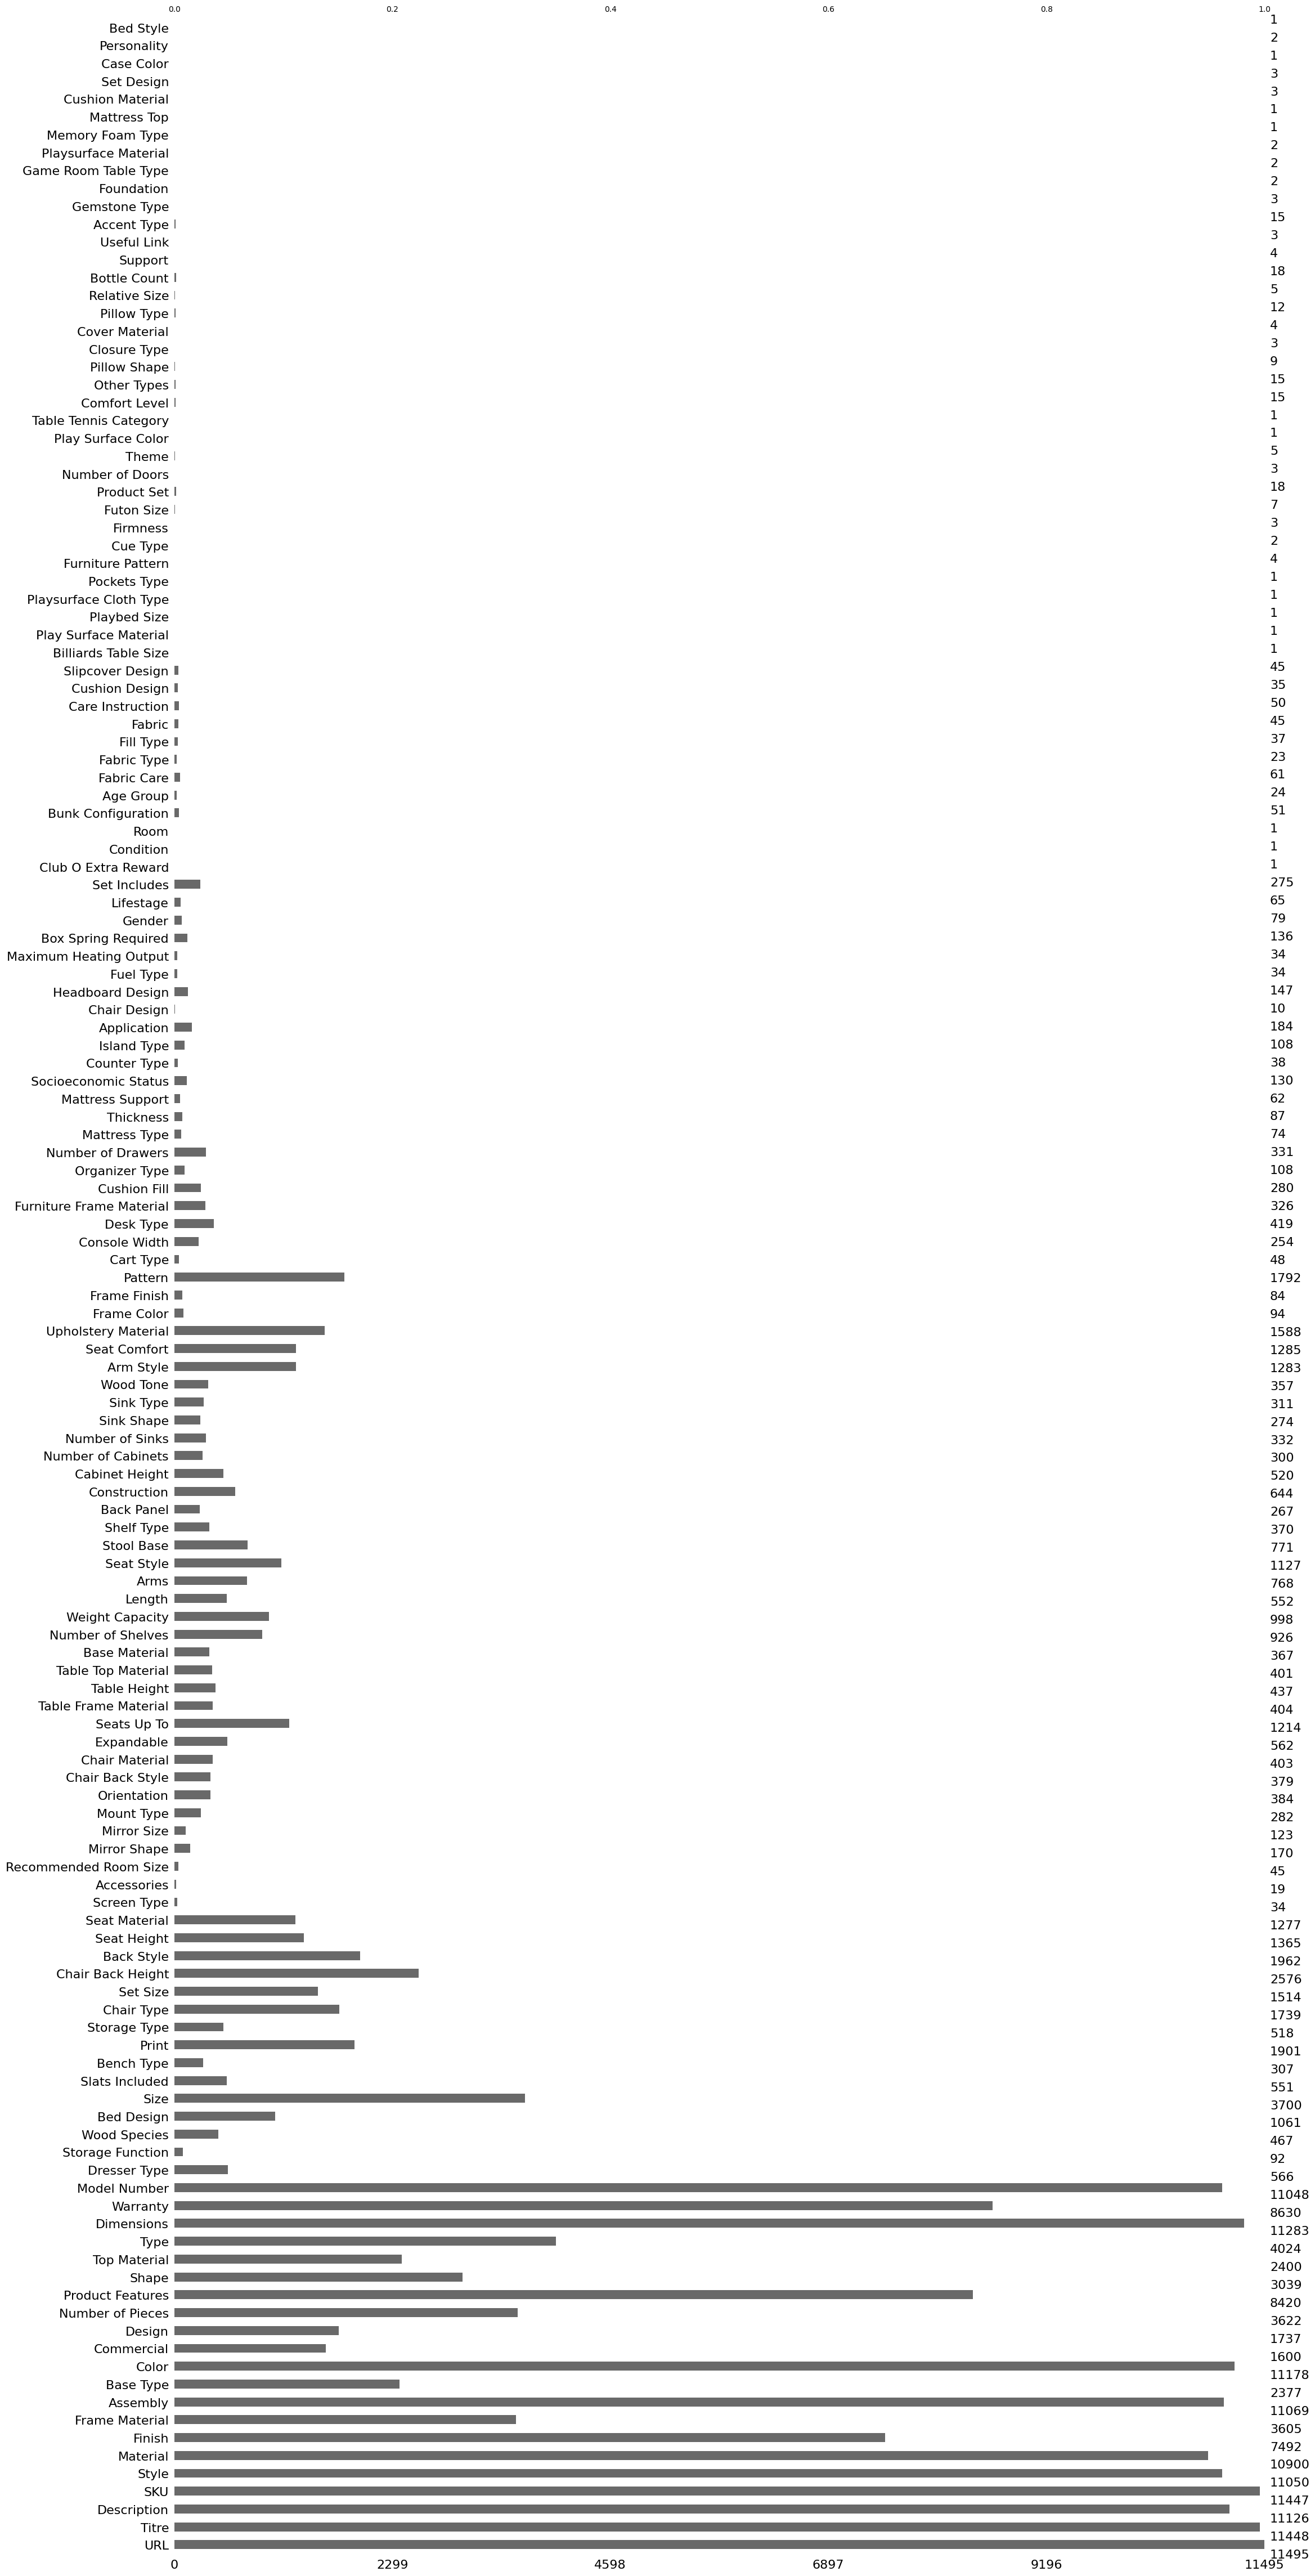

In [12]:
msno.bar(df);

In [13]:
df_clean = df.iloc[:,:21]

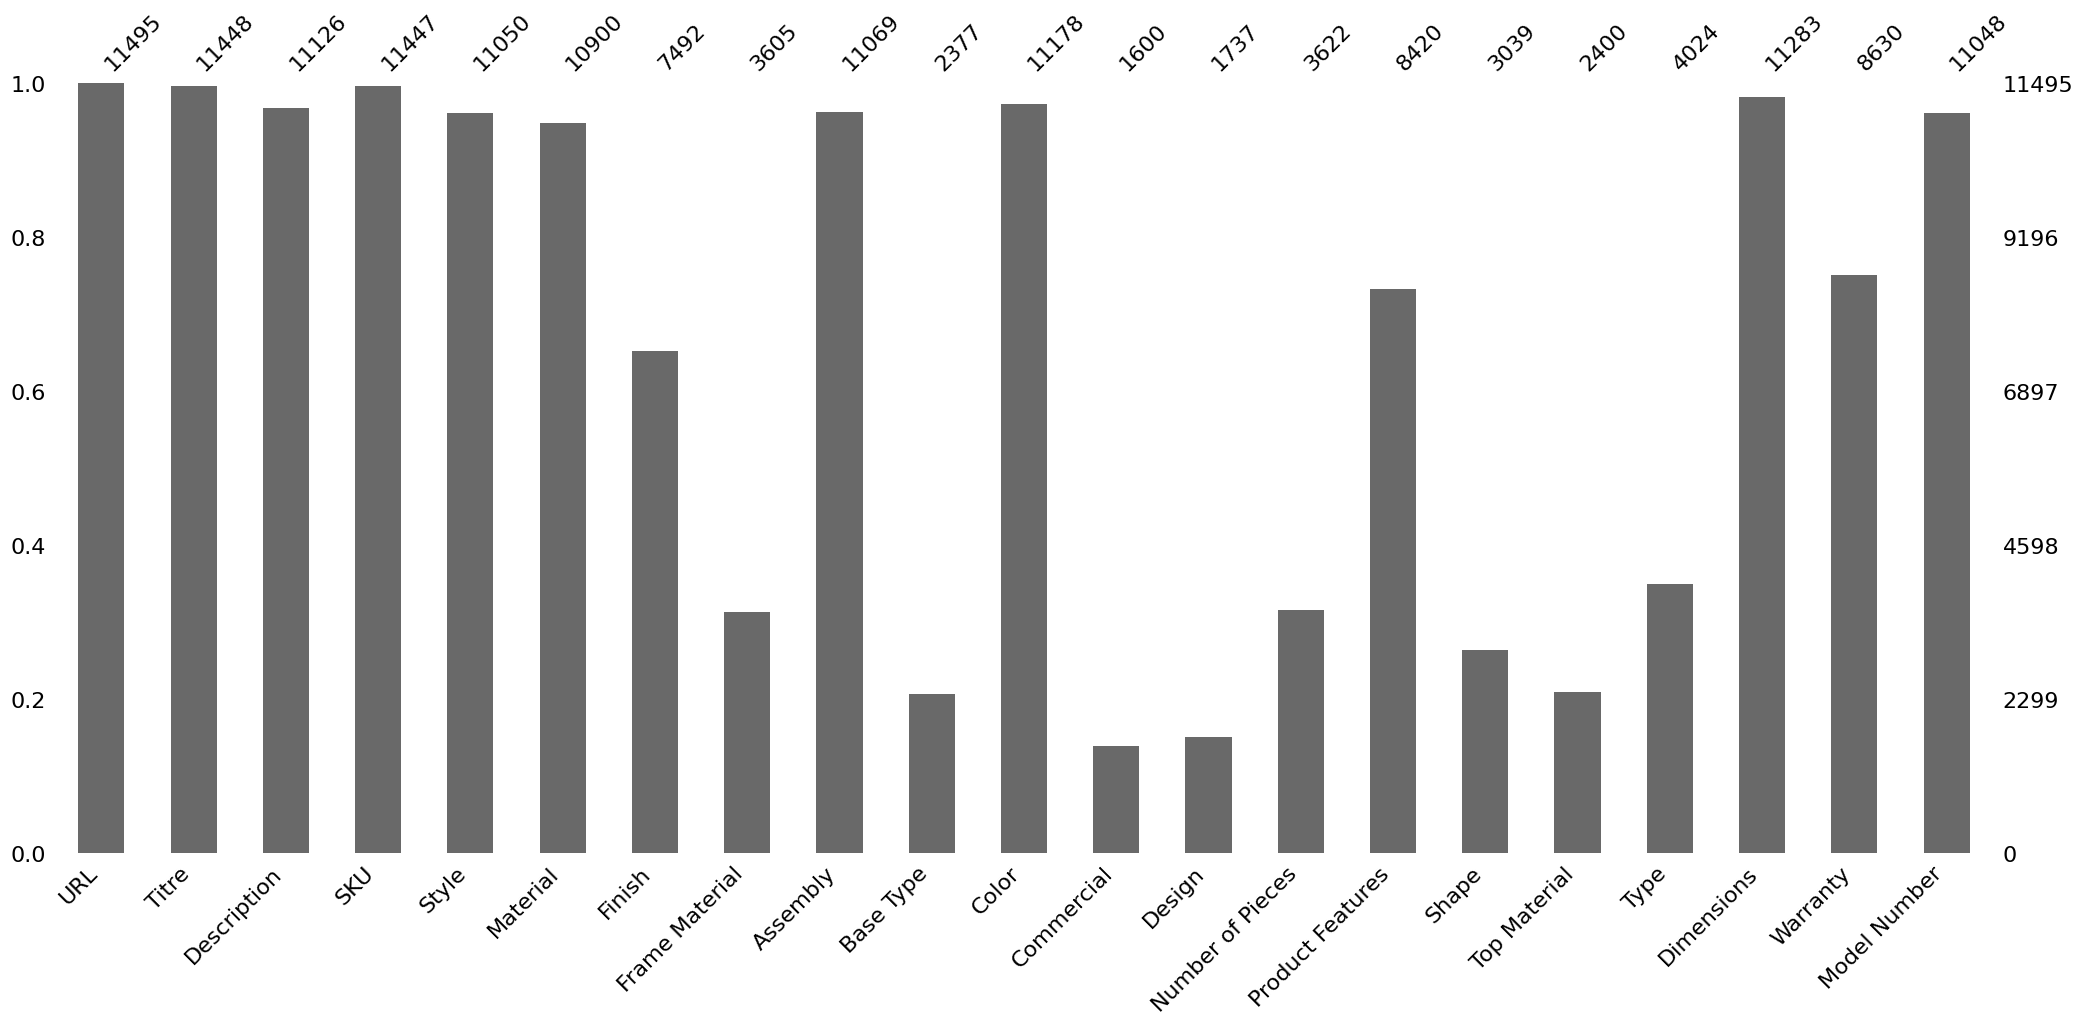

In [14]:
msno.bar(df_clean);

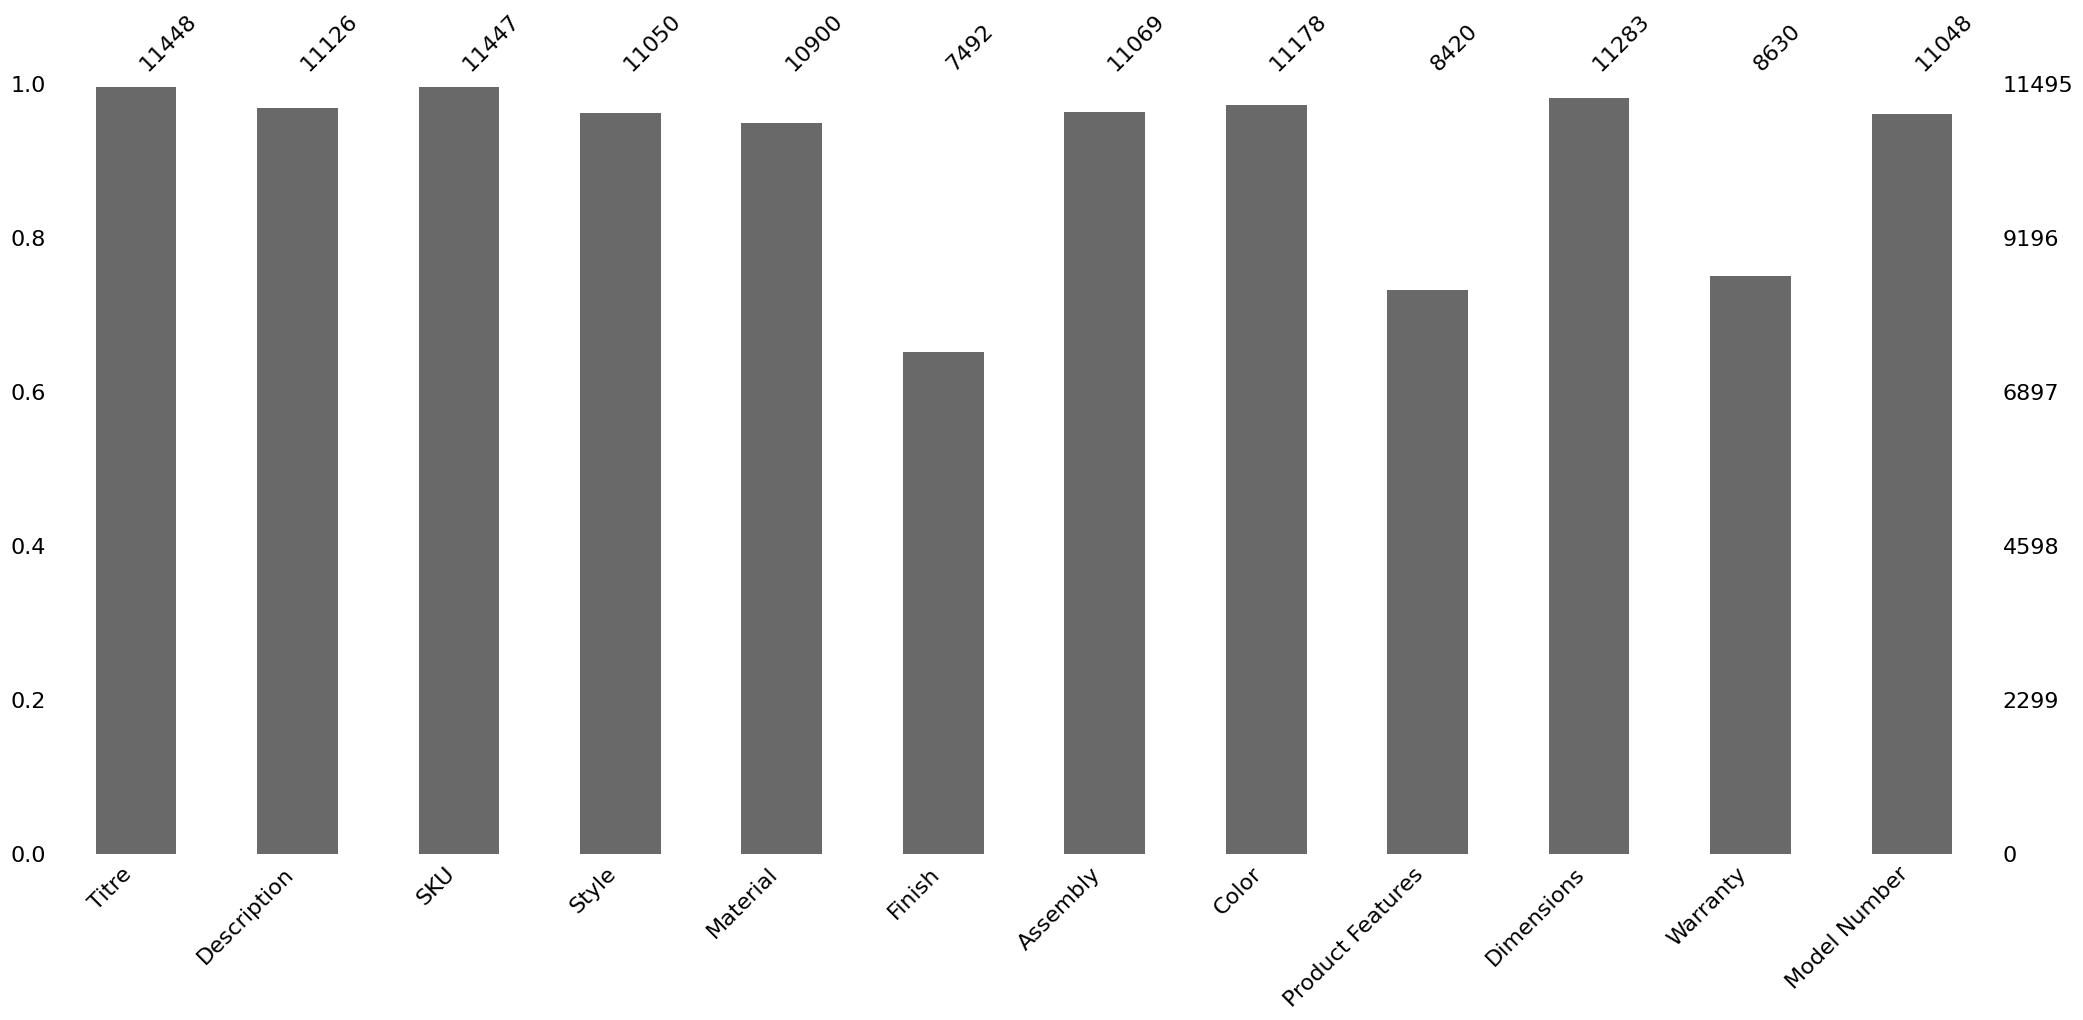

In [15]:
df_clean = df.loc[:, df.isnull().mean() < 0.4]
df_clean = df_clean.drop(columns=['URL'])
msno.bar(df_clean);

In [16]:
df_clean.shape

(11495, 12)

In [17]:
df_clean.sample(3)

,Titre,Description,SKU,Style,Material,Finish,Assembly,Color,Product Features,Dimensions,Warranty,Model Number
1350,Rosdale Grey Upholstered Storage Bed w/ USBs b...,Convenience blends with welcoming softness in ...,40401356-000-000,"Modern & Contemporary,\n ...","Upholstered,\n ...",NaN,Assembly Required,Grey,Includes Hardware,See Description,1 year Limited Manufacturer,9476IA-S
6490,Bookcase with Doors Farmhouse Bookshelf,NaN,43871129-000-003,Modern & Contemporary,MDF,Natural Finish,Assembly Required,"Black,\n Brown,...",NaN,11.8 In. L X 23.6 In. W X 71.4 In. H,30 day Manufacturer,ZOEYSJ_PHO_0YN71NSR
9755,Nestfair Power Motion Recliner with 2 Cup Hold...,"This Recliner will bring the best of comfort, ...",37807215-000-001,Modern & Contemporary,"Faux Leather,\n ...",NaN,Assembly Required,"Black,\n Brown",Power Recline,See Description,90 day Limited Manufacturer,AM032701


Immpute Finish

In [18]:
from sklearn.impute import SimpleImputer


simpleImputer = SimpleImputer(strategy='most_frequent')
df_clean_imputed = pd.DataFrame(simpleImputer.fit_transform(df_clean), columns=df_clean.columns)